## Q2 - AdaLine

In [2]:
import numpy as np
import pandas as pd
from operator import add
import matplotlib.pyplot as plt

### 2.1) AdaLine

#### part A

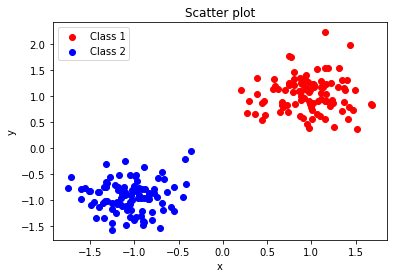

In [18]:
# Generating the numbers
np.random.seed(2)
x1= np.random.normal(1,0.3, 100)
y1= np.random.normal(1,0.3, 100)
x2= np.random.normal(-1,0.3, 100)
y2= np.random.normal(-1,0.3, 100)

# Scatter plot
plt.scatter(x1,y1,color="red")
plt.scatter(x2,y2,color="blue")
plt.title("Scatter plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Class 1","Class 2"],loc="upper left");

#### part B

#### Organizing the data into a Dataframe

In [187]:
data = pd.DataFrame(list(zip(np.concatenate((x1,x2)), np.concatenate((y1,y2)), [1]*100 + [-1]*100)), columns =['x','y','target'])
data = data.sample(frac=1).reset_index(drop=True)
data

,x,y,target
0,-0.629790,-0.853451,-1
1,-0.919608,-0.965784,-1
2,-0.834201,-0.901880,-1
3,-1.305895,-1.017354,-1
4,-0.974391,-0.625465,-1
...,...,...,...
195,-1.431143,-1.351947,-1
196,-0.779535,-0.872574,-1
197,-0.886362,-0.369331,-1
198,0.953070,1.129719,1


#### defining the AdaLine Network function

In [298]:
def cost_fuct(target,net):
    return 0.5*((target - net)**2)

def AdaLine(data,alpha= 0.1,threshold = 0.5):
    """
    input: data = data with 2 features , alpha = learning rate , threshold = the threshold for terminating the algorithm
    output: errors_all = errors in all iterations , w = weights vector , b = bias

    """
    w = np.random.uniform(-.05,.05,[2])
    b = np.random.uniform(-.05,.05,[1])
    lms = [10]*len(data)
    errors = []
    errors_all = []
    terminate = False
    epoch_counter = 0
    while (epoch_counter < 50):
        errors = []
        for ind in data.index:
            sample = data.loc[ind,:]
            
            net = w[0]*sample['x'] + w[1]*sample['y'] + b
            t = sample['target']
            lms[ind] = cost_fuct(t,net)
            error = t - net
            errors.append(error**2)
            w[0] = w[0] + alpha * error * sample['x']
            w[1] = w[1] + alpha * error * sample['y']
            b = b + alpha * error
 
        errors_all.append(errors[ind]/2.0)
        print(f"iteration {epoch_counter+1} done.")
        if all(np.array(lms) < threshold):
            return(errors_all,w,b,lms)
        epoch_counter += 1
    else:
        return(errors_all,w,b,lms)

        
    


#### training the Adaline network

In [259]:
errors,weights,bias,lms =AdaLine(data,alpha = 0.001,threshold = 0.32)

iteration 1 done.
iteration 2 done.
iteration 3 done.
iteration 4 done.
iteration 5 done.
iteration 6 done.
iteration 7 done.
iteration 8 done.
iteration 9 done.
iteration 10 done.
iteration 11 done.
iteration 12 done.


#### plotting the separator line trained by the network

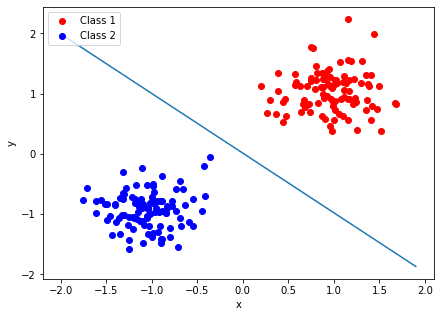

In [276]:
sorted_data = data.sort_values(by='target',ascending=False).reset_index(drop=True).copy()
plt.figure(figsize=(7,5))
plt.plot(sorted_data.loc[:100,'x'], sorted_data.loc[:100,'y'],'ro')
plt.plot(sorted_data.loc[100:200,'x'], sorted_data.loc[100:200,'y'], 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Class 1','Class 2'],loc='upper left')

y = np.arange(-2, 2, 0.1)
x = -(weights[1] * y + bias) / weights[0]
plt.plot(y, x)
plt.show()

#### plotting the mean_squared_error per epoch

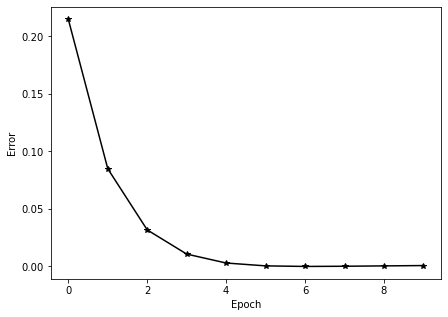

In [262]:
plt.figure(figsize=(7,5))
plt.plot(errors[:10],'k*-')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show();

### part C

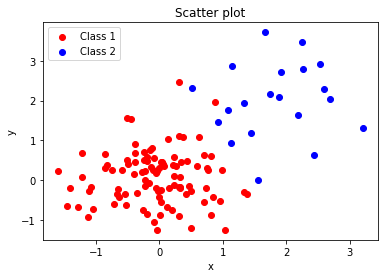

In [280]:
# Generating the numbers
np.random.seed(2)
x1= np.random.normal(0,0.6, 100)
y1= np.random.normal(0,0.6, 100)
x2= np.random.normal(2,0.8, 20)
y2= np.random.normal(2,0.8, 20)

# Scatter plot
plt.scatter(x1,y1,color="red")
plt.scatter(x2,y2,color="blue")
plt.title("Scatter plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Class 1","Class 2"],loc="upper left");

#### Organizing the data into a Dataframe

In [281]:
data = pd.DataFrame(list(zip(np.concatenate((x1,x2)), np.concatenate((y1,y2)), [1]*100 + [-1]*20)), columns =['x','y','target'])
data = data.sample(frac=1).reset_index(drop=True)
data

,x,y,target
0,0.624494,1.082686,1
1,-0.092097,-1.058951,1
2,-0.054872,-0.188770,1
3,2.191961,1.641460,-1
4,1.079198,1.750183,-1
...,...,...,...
115,0.228283,0.108246,1
116,-0.505048,1.551177,1
117,0.339765,0.455022,1
118,-0.011478,-0.419154,1


#### training the Adaline network

In [299]:
errors,weights,bias,lms =AdaLine(data,alpha = 0.001,threshold = 0.32)

iteration 1 done.
iteration 2 done.
iteration 3 done.
iteration 4 done.
iteration 5 done.
iteration 6 done.
iteration 7 done.
iteration 8 done.
iteration 9 done.
iteration 10 done.
iteration 11 done.
iteration 12 done.
iteration 13 done.
iteration 14 done.
iteration 15 done.
iteration 16 done.
iteration 17 done.
iteration 18 done.
iteration 19 done.
iteration 20 done.
iteration 21 done.
iteration 22 done.
iteration 23 done.
iteration 24 done.
iteration 25 done.
iteration 26 done.
iteration 27 done.
iteration 28 done.
iteration 29 done.
iteration 30 done.
iteration 31 done.
iteration 32 done.
iteration 33 done.
iteration 34 done.
iteration 35 done.
iteration 36 done.
iteration 37 done.
iteration 38 done.
iteration 39 done.
iteration 40 done.
iteration 41 done.
iteration 42 done.
iteration 43 done.
iteration 44 done.
iteration 45 done.
iteration 46 done.
iteration 47 done.
iteration 48 done.
iteration 49 done.
iteration 50 done.


#### plotting the separator line trained by the network

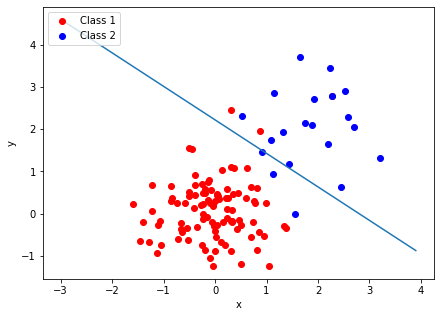

In [300]:
sorted_data = data.sort_values(by='target',ascending=False).reset_index(drop=True).copy()
plt.figure(figsize=(7,5))
plt.plot(sorted_data.loc[:100,'x'], sorted_data.loc[:100,'y'],'ro')
plt.plot(sorted_data.loc[100:120,'x'], sorted_data.loc[100:120,'y'], 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Class 1','Class 2'],loc='upper left')

y = np.arange(-3, 4, 0.1)
x = -(weights[1] * y + bias) / weights[0]
plt.plot(y, x)
plt.show()

#### plotting the mean_squared_error per epoch

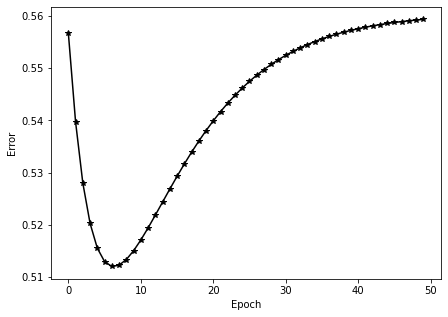

In [301]:
plt.figure(figsize=(7,5))
plt.plot(errors,'k*-')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show();